# Final Proyect Supervised Learning

## Caso 1. Predicción de enfermedades cardiovasculares

A new system for the early detection of cardiovascular pathologies has been developed. However, performing the test and making the diagnosis is a costly and slow process. Therefore, your company asks you to develop an algorithm to filter out cases that do not require such an exhaustive detection process.

- Select an appropriate classification algorithm for this problem (being able to detect patients with or without cardiovascular pathology). Justify your choice.

- Show the results of the algorithm, attempting to meet the client’s specific requirements:
   - Minimize false negatives (patients with the pathology incorrectly classified as healthy).

   - Maintain an acceptable level of false positives (healthy patients incorrectly classified as having the disease).

- Investigate other possible algorithms beyond those studied in class that may be suitable for this problem. Select one and compare its performance with the initial algorithm.


### Loading the data and overview of the dataset

We use the dataset [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data).

- This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. **The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease**.

- Information about the attributes (14 used in total):
    - age: age in years
    - sex: sex (1 = male; 0 = female)
    - cp: chest pain type:
        - Value 0: typical angina
        - Value 1: atypical angina
        - Value 2: non-anginal pain
        - Value 3: asymptomatic
    - trestbps: resting blood pressure in mm Hg on admission to the hospital
    - chol: serum cholestoral in mg/dl
    - fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    - restecg: resting electrocardiographic results:
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach: maximum heart rate achieved
    - exang: exercise induced angina (1 = yes; 0 = no)
    - oldpeak: ST depression induced by exercise relative to rest
    - slope: the slope of the peak exercise ST segment:
        - Value 0: upsloping (normal)
        - Value 1: flat (stable)
        - Value 2: downsloping (unhealthy)
    - ca: number of major vessels (0-3) colored by flourosopy
    - thal:
        - Value 1: normal
        - Value 2: fixed defect
        - Value 3: reversible defect
    - target: 0 = no disease, 1 = disease
> The names and social security numbers of the patients were removed from the database, replaced with dummy values.



In [60]:
import pandas as pd

df = pd.read_csv('datasets/heart.csv')
print("Dataset size:", df.shape)
df.head()

Dataset size: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [71]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB
None
              age         sex          cp   trestbps        chol        fbs  \
count  296.000000  296.000000  296.000000  296.00000  296.000000  296.00000   
mean    54.523649    0.679054    0.959459  131.60473  247.155

### Data Cleaning

In [70]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


- There are no missing values in the dataset, so data imputation or removal of rows/columns with missing values is not necessary.

In [62]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates(ignore_index=True) # it keeps the first occurrence by default
print("Dataset size after removing duplicates:", df.shape)

Number of duplicate rows: 723
Dataset size after removing duplicates: (302, 14)


> There is 723 duplicated rows in the dataset. After removing them, we have 302 unique rows, which is a very small dataset for training a classification model.
 
> This will limit the complexity of the models we can use and may lead to overfitting. We will need to be careful with model selection and validation to ensure we get reliable results.

We check again the source of our data and we found that the [original dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) contains 303 unique rows. We will stick for the exercise to the 302 unique rows we have after removing duplicates, but we will check if there are more incosistencies.

In [63]:
print(df['thal'].value_counts())
print(df['slope'].value_counts())
print(df['target'].value_counts())
print(df['ca'].value_counts())
print(df['sex'].value_counts())
print(df['cp'].value_counts())
print(df['fbs'].value_counts())
print(df['restecg'].value_counts())
print(df['exang'].value_counts())

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64
slope
2    141
1    140
0     21
Name: count, dtype: int64
target
1    164
0    138
Name: count, dtype: int64
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
sex
1    206
0     96
Name: count, dtype: int64
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
fbs
0    257
1     45
Name: count, dtype: int64
restecg
1    151
0    147
2      4
Name: count, dtype: int64
exang
0    203
1     99
Name: count, dtype: int64


ca and thal features seems to have some inconsistent values (4 and 0 respectively), we will remove those rows.

In [64]:
df = df[(df['ca'] != 4) & (df['thal'] != 0)]
print("Dataset size after removing inconsistent values:", df.shape)

Dataset size after removing inconsistent values: (296, 14)


Now that our dataset is clean, we can start exploring it and training models.

### Data Analysis

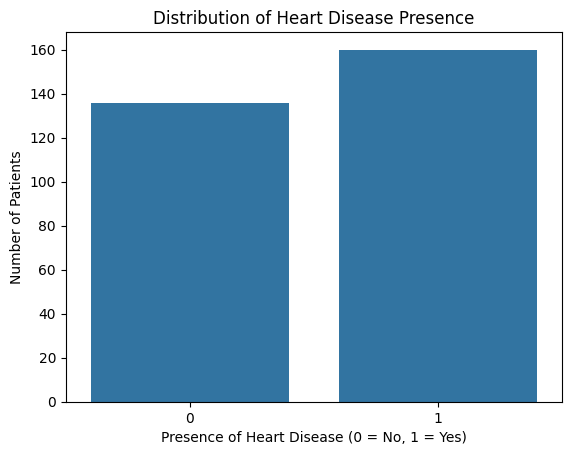

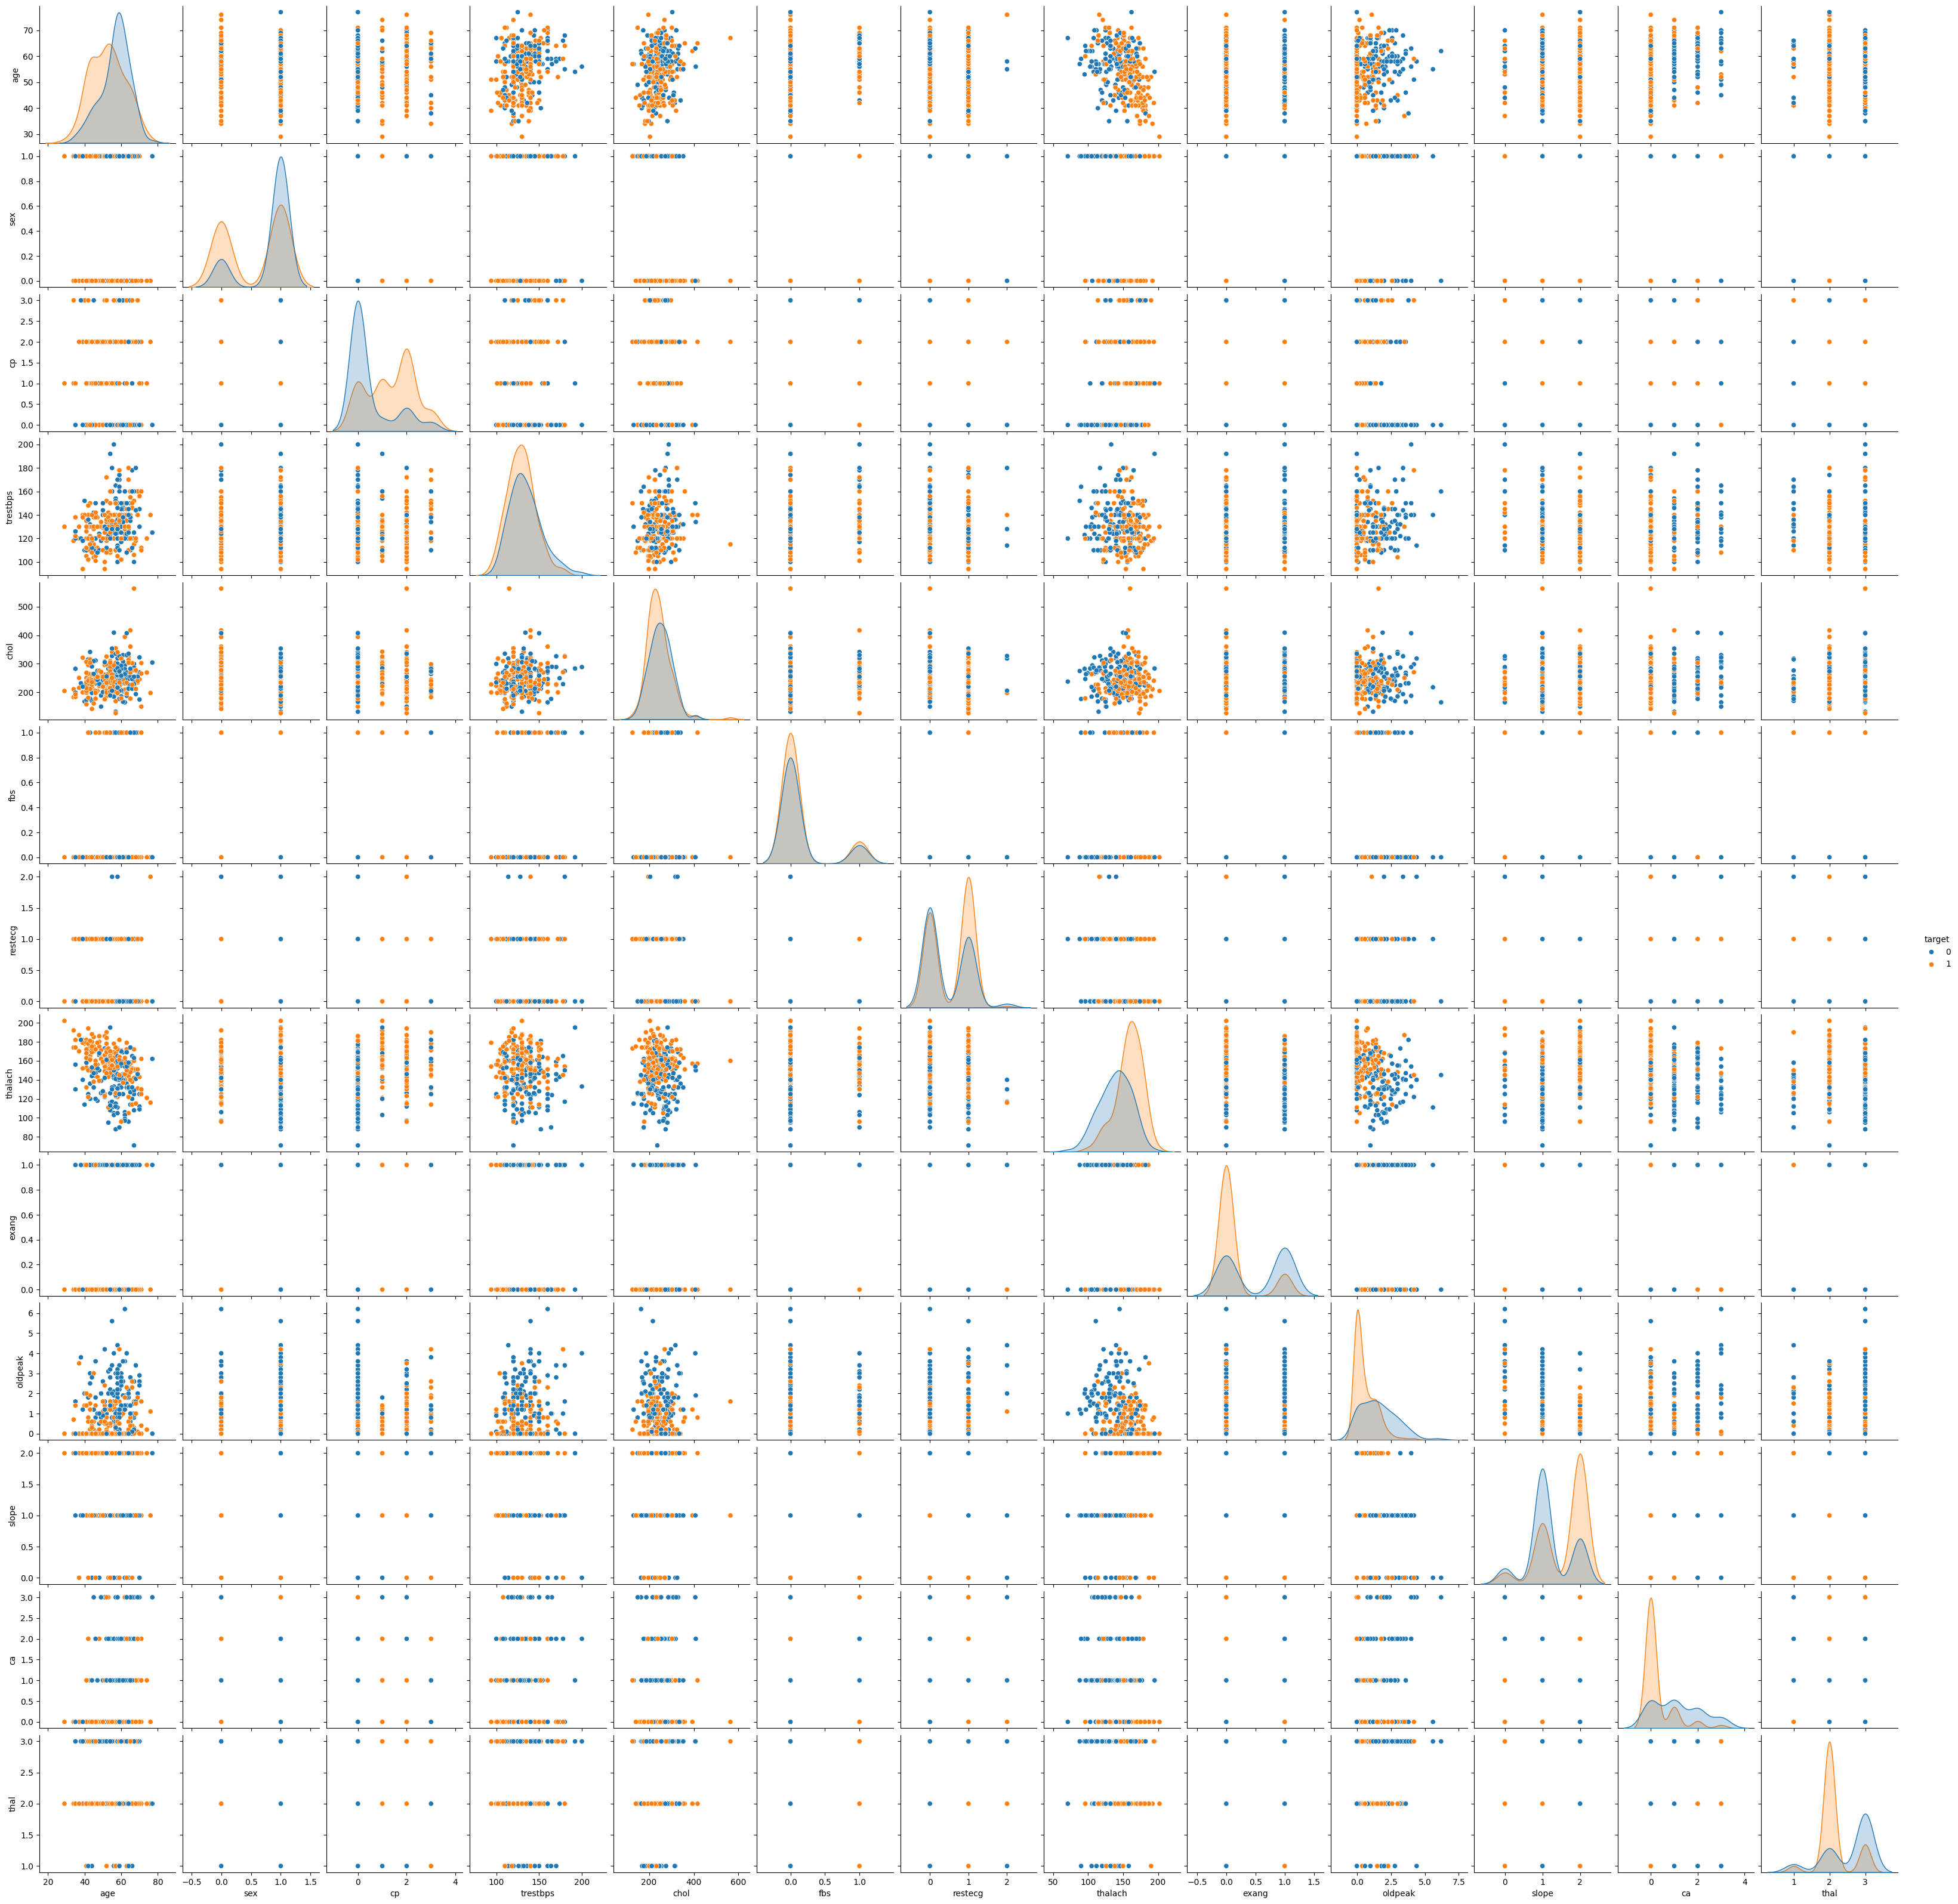

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Presence')
xlabel = 'Presence of Heart Disease (0 = No, 1 = Yes)'
ylabel = 'Number of Patients'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

sns.pairplot(df, hue='target')
plt.show()

- Of the 14 features:
    - sex (binary)
    - cp (4 categories)
    - fbs (binary)
    - restecg (3 categories)
    - exang (binary)
    - slope (3 categories)
    - ca (4 categories)
    - thal (3 categories)
    - target (binary)
are categorical features, while the rest are numerical:
    - age (units: years)
    - trestbps (units: mm Hg)
    - chol (units: mg/dl)
    - thalach (units: beats per minute)
    - oldpeak (units: depression)
- The average age of patients is 54 years, with a standard deviation of 9.1 years.
- The data is balanced, with approximately half of patients having heart disease and half not.
> But it shows a higher amount of male patients (approximately 70%) compared to female patients (approximately 30%), we will focus on this aspect in our analysis next.

> The numeric features have different scales, so we will need to standardize or normalize them before training models that are sensitive to feature scaling (e.g., SVM, KNN, etc.).

> The categorical features will need to be encoded appropriately (e.g., one-hot encoding, label encoding, etc.) before training models.

In [66]:
num_males = len(df[df['sex'] == 1])
num_females = len(df[df['sex'] == 0])
print(f'Number of male patients: {num_males}')
print(f'Number of female patients: {num_females}')
mask_male_with_disease = (df['sex'] == 1) & (df['target'] == 1)
mask_female_with_disease = (df['sex'] == 0) & (df['target'] == 1)

mean_male_age = df[mask_male_with_disease]['age'].mean()
mean_female_age = df[mask_female_with_disease]['age'].mean()
proportion_female_with_disease = len(df[mask_female_with_disease]) / num_females
proportion_male_with_disease = len(df[mask_male_with_disease]) / num_males


print(f'Average age of men with heart disease: {mean_male_age:.2f}')
print(f'Average age of women with heart disease: {mean_female_age:.2f}')
print(f'Proportion of men with heart disease: {proportion_male_with_disease * 100:.2f}%')
print(f'Proportion of women with heart disease: {proportion_female_with_disease * 100:.2f}%')

Number of male patients: 201
Number of female patients: 95
Average age of men with heart disease: 51.10
Average age of women with heart disease: 54.58
Proportion of men with heart disease: 44.28%
Proportion of women with heart disease: 74.74%


- Average age of male patients with heart disease is lower than that of female patients with heart disease (51 vs 54 years). This suggests that male patients may be at a higher risk of developing heart disease at a younger age compared to female patients.
- But the proportion of female patients with heart disease (74.74%) is higher than that of male patients (44.28%). This indicates that female patients may be more likely to develop heart disease compared to male patients.

> This should be contextualized with the fact that there are significantly more male patients (n=201) than female patients (n=95) in the dataset.

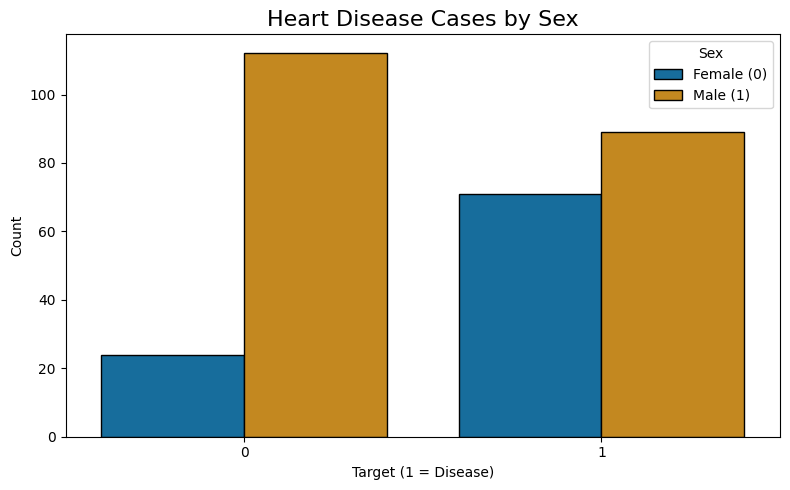

In [67]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df, 
    x="target", 
    hue="sex",
    palette="colorblind",
    edgecolor="black"
)

plt.title("Heart Disease Cases by Sex", fontsize=16)
plt.xlabel("Target (1 = Disease)")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.legend(title="Sex", labels=["Female (0)", "Male (1)"])
plt.tight_layout()
plt.show()

Visually, the number of heart disease cases appears similar for both males and females. However, because there are more male patients overall, the proportion of females with heart disease is actually higher. This explains why the female proportion is greater despite the similar case counts.

Although the dataset could be rebalanced through oversampling or undersampling, we will proceed without it due to the small sample size, focusing on the overall population rather than gender stratification.

Let's see now the correlation matrix to identify relevant features for the model.

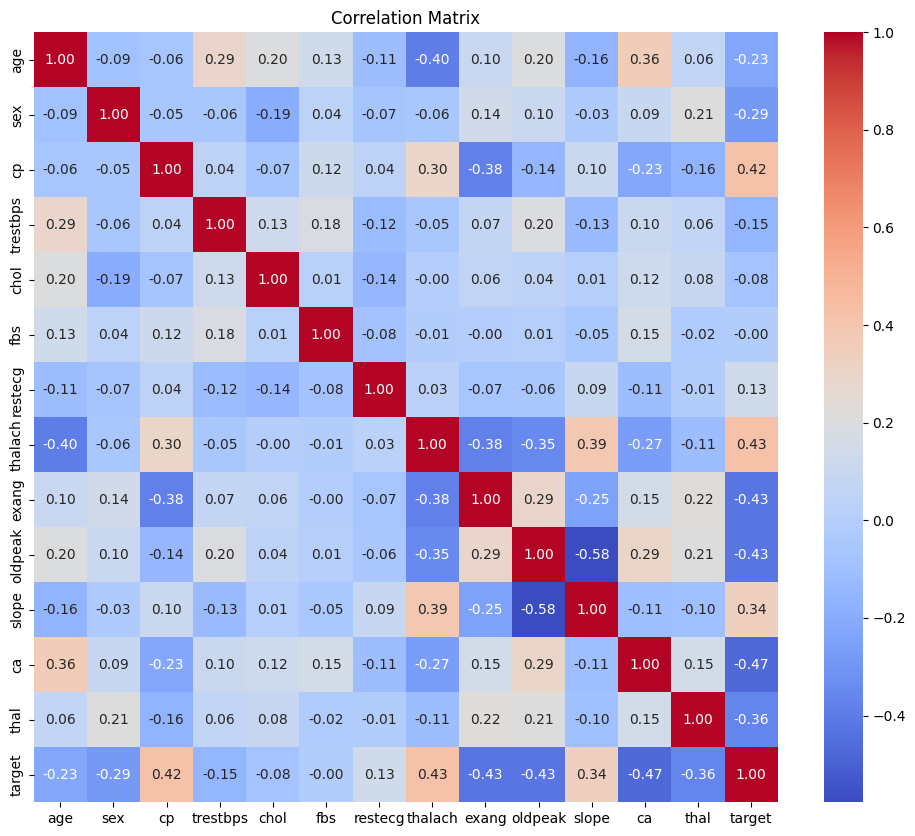

In [68]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- The features that show the highest correlation with the target variable (presence of heart disease) are:
    - 'cp' (chest pain type) with a correlation of approximately 0.42
    - 'thalach' (maximum heart rate achieved) with a correlation of approximately 0.43
    - 'slope' (the slope of the peak exercise ST segment) with a correlation of approximately 0.34
> These features are likely to be the most informative for predicting the presence of heart disease and should be prioritized when selecting features for the classification model.

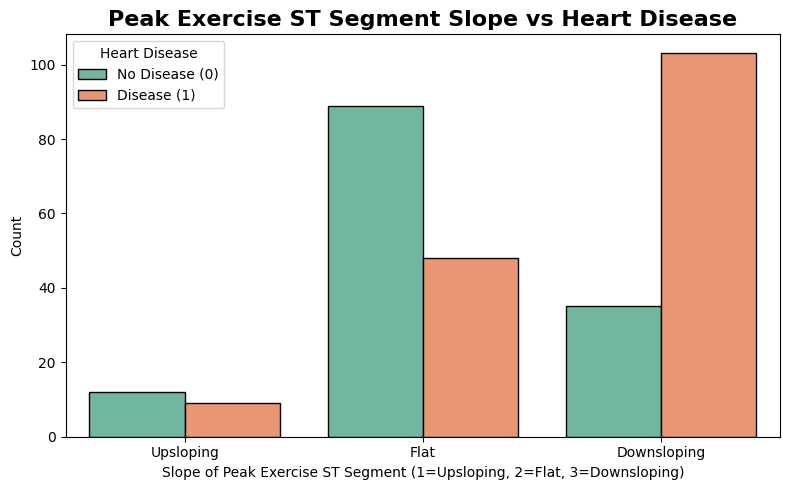

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='slope',
    hue='target',
    palette='Set2',
    edgecolor='black'
)

plt.title("Peak Exercise ST Segment Slope vs Heart Disease", fontsize=16, weight='bold')
plt.xlabel("Slope of Peak Exercise ST Segment (1=Upsloping, 2=Flat, 3=Downsloping)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease (0)", "Disease (1)"])
plt.xticks([0,1,2], ["Upsloping", "Flat", "Downsloping"])  # better x-axis labels
plt.tight_layout()
plt.show()


Slope indicates the slope of the peak exercise ST segment. A higher slope value is associated with a lower risk of heart disease, while a lower slope value indicates a higher risk. This feature reflects the heart's response to exercise and can provide insights into cardiovascular health.

Slope values:
- 0: Upsloping ST segment (normal response to exercise)
- 1: Flat ST segment (intermediate risk)
- 2: Downsloping ST segment (higher risk of heart disease)

> We can see that patients with a slope value of 2 (downsloping ST segment) have a higher prevalence of heart disease compared to those with slope values of 0 or 1. This suggests that the slope of the peak exercise ST segment is an important feature for predicting heart disease.

In [ ]:
TODO:
- check the other features thalach and slope
- See other relations of features in the heatmap
- Normalize / Standardize data if necessary

## Caso 2. Clasificador del nivel de estrés

Tu departamento de recursos humanos quiere prevenir el estrés de los empleados dentro de la compañía. Para ello, lo principal es detectar el nivel de estrés de estos.

Debes desarrollar una solución que indique el nivel de estrés de un empleado que responde a un cuestionario. El nivel de estrés puede ser: no estresado (0-3), estresado(3-6) y extremadamente estresado(7-8).

1. Selecciona un algoritmo de los estudiados que pueda devolver el nivel de estrés del empleado (0-8). Justifica tu elección.
2. Determinar qué variables son las que más información aportan para predecir el nivel de estrés.
3. Clasificar los resultados del algoritmo en las 3 categorías de estrés indicadas (no estresado, estresado, extremadamente estresado) que piden en recursos humanos.
4. Reflexionar y responder a estas cuestiones:
    - ¿Crees que los datos usados son suficientes para predecir el nivel de estrés de un empleado? ¿Por qué?